In [19]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import random

C:\Users\jwdes\AppData\Local\Temp\ipykernel_15820\3547928197.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gist_rainbow", len(t_total_values))


KeyboardInterrupt: 

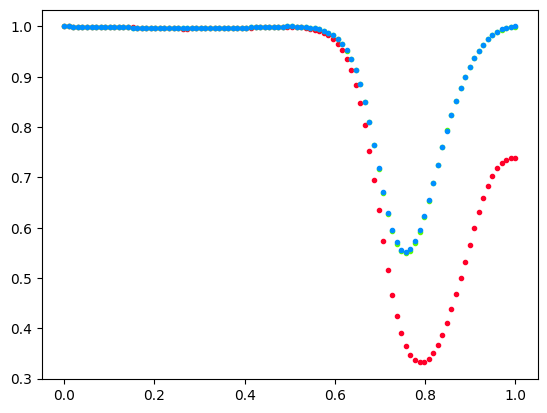

In [20]:
# Parameters
N = 4
M = 4
mu = 10
V = 1

t_total_values = [10,100,500]  # List of t_total values to test
t_points = 100  # Higher resolution for better accuracy

# Prepare the figure
fig, ax = plt.subplots()

cmap = get_cmap("gist_rainbow", len(t_total_values))

for i, t_total in enumerate(t_total_values):
    color = cmap(i)
    # Random J/V ratio for each t_total
    J_V_ratio = 2
    J = J_V_ratio * V

    # Construct Hamiltonians
    H0 = construct_initial_hamiltonian(N, M, mu)
    Hf = construct_hamiltonian(N, M, J, V)

    # Initial state
    eigvals, eigvecs = np.linalg.eigh(H0)
    psi0 = eigvecs[:, 0]
    psi0 = psi0 / np.linalg.norm(psi0)  # Ensure normalization

    # Evolve the system
    t, psi_t = evolve_system(H0, Hf, psi0, t_total, t_points, interpolation_type = "linear")

    # Calculate ground state probabilities
    ground_state_prob = np.zeros_like(t)
    for i in range(len(t)):
        s = np.sin((np.pi/2) * (t[i] / t_total))**2
        H_s = construct_intermediate_hamiltonian(H0, Hf, s)
        _, eigvecs_s = exact_diagonalize(H_s)
        psi_ground_state_s = eigvecs_s[0]  # Ground state at time t
        ground_state_prob[i] = np.abs(np.dot(np.conjugate(psi_ground_state_s), psi_t[:, i]))**2

    # Plot the result for this t_total
    ax.plot(t/t_total, ground_state_prob, '.', color = color, label=f"$t_{{total}}$ = {t_total}")

# Customize the plot
ax.set_xlabel("Time [t/t_total]")
ax.set_ylabel("Ground State Probability")
ax.set_title(f"Adiabatic Evolution: N = {N}, M = {M}, J/V = {J_V_ratio}, $\mu$ = {mu}")
ax.set_ylim(0, 1.05)
ax.grid()
ax.legend()

# Show the plot
plt.show()